![GWU Logo](gw_horizontal_2c_rev.png){width=600px}

# EXAMINING ROAD SAFETY IN WASHINGTON DC

**A DEMONSTRATION DATA SCIENCE WORKFLOW FOR SPATIAL JOINS AND VISUALIZATIONS**

>DR JHK

>MILKEN INSTITUTE SCHOOL OF PUBLIC HEALTH

## Background

Car crashes remain a serious public health and safety challenge in Washington, D.C., with 2024 marking yet another year of concern for residents, policymakers, and public agencies[3][11]. The District continues to struggle with high accident rates despite ongoing efforts like the Vision Zero initiative, which sought to eliminate traffic fatalities through measures such as lowering speed limits, installing traffic cameras, and increased enforcement[3]. Nevertheless, recent years have seen record numbers of crashes and deaths, with accident rates in 2024 reportedly reaching the highest levels in sixteen years and over 17,000 recorded incidents according to regional traffic reports[11].

It has been reported that most fatal traffic accidents are concentrated in the city’s east side, particularly in wards five, seven, and eight, with notable hotspots downtown in Ward Two[3]. Multi-vehicle collisions remain prevalent, often resulting in severe injuries and hospitalizations, and complicating post-crash investigations and liability determinations[9].

Crash types in D.C. commonly include rear-end collisions, sideswipes, angle (T-bone) crashes, car-versus-pedestrian incidents, and collisions with fixed objects[3]. Serious injuries have affected not just drivers, but also passengers and those outside vehicles, with more than $6000$ traffic-related injuries reported in a single year[3]. Incidents involving multi-vehicle pileups, rollovers, and crashes with commercial trucks further demonstrate the diversity and complexity of traffic safety challenges in the District[5][9].

Despite enhanced policies to reduce accident risk, such as lowering speed limits on major corridors and intersections, traffic incidents remain a stubbornly persistent issue. The Vision Zero program has yet to achieve its ambitious target, with officials acknowledging the difficulties in reaching zero fatalities by 2024[3]. The ongoing public health burden validates the importance of granular, data-driven analysis and geospatial investigation to identify risk factors, hotspot locations, and effective interventions.

## Method

This geospatial data science demonstration project aims to analyze traffic crash data in Washington D.C. using Python and various data science libraries. The goal is to demonstrate the use of Python code in a notebook format by uncovering insights and patterns related to traffic accidents, with a focus on pedestrian and bicyclist safety.

There are two datasets that we use in this notebook. Both datasets are from the [DC Open Data portal](https://opendata.dc.gov). The first dataset contains information on [traffic crashes in Washington, DC](https://opendata.dc.gov/datasets/70392a096a8e431381f1f692aaa06afd_24/explore?location=0.003845%2C-77.019147%2C0.00). The second dataset contains the [boundaries of the wards in Washington, DC](https://opendata.dc.gov/datasets/c5cd8b40fb784548a6680aead5f919ed_53/explore?location=38.893637%2C-77.014474%2C11.91).

This notebook file and the associated data files are in the same folder.

## Introduction

Data with latitude and longitude coordinates are often used in the public health setting. In order to better understand the context of the data, it is common to join these point locations to other spatial data, such as census tracts or neighborhoods.

In this notebook we explore traffic crash data in the various wards of Washington, DC, focusing on spatial joins and visualizations to understand the distribution and characteristics of crashes.

## Import Python Libraries

The following code imports the necessary Python libraries for data manipulation, geospatial analysis, and visualization used in this notebook.

In [144]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs

In [145]:
%config InlineBackend.figure_format = 'retina'

## Import the Data

Both of the files used in this project are in `geojson` format. They are imported below using the `read_file` function from the `geopandas` library. The resultant GeoDataFrame objects are assigned to the variables `crashes` and `wards`, respectively.

In [146]:
# Import the `Crashes_in_DC.geojson` and assign it to the variable `crashes`
# Import the `DC_Wards_from_2022.geojson` files and assign it to the variable `wards`
crashes = gpd.read_file('Crashes_in_DC.geojson')
wards = gpd.read_file('DC_Wards_from_2022.geojson')

Below, we calculate the total number of rows in the `wards` GeoDataFrame object, as well as the number of variables (columns).

In [147]:
# Return the shape of the `wards` GeoDataFrame
wards.shape

(8, 21)

The `info` methods returns information aboute the `wards` GeoDataFrame, including the number of entries, column names, data types, and memory usage.

In [148]:
# Display information about the `wards` GeoDataFrame
wards.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   WARD              8 non-null      int32              
 1   NAME              8 non-null      object             
 2   REP_NAME          8 non-null      object             
 3   WEB_URL           8 non-null      object             
 4   REP_PHONE         8 non-null      object             
 5   REP_EMAIL         8 non-null      object             
 6   REP_OFFICE        8 non-null      object             
 7   WARD_ID           8 non-null      object             
 8   LABEL             8 non-null      object             
 9   STUSAB            8 non-null      object             
 10  SUMLEV            8 non-null      object             
 11  GEOID             8 non-null      object             
 12  GEOCODE           8 non-null      object             
 13  S

We print a list of all the columns using the `columns` atribute.

In [149]:
# Print a list of the column names in the `wards` GeoDataFrame
print(wards.columns)

Index(['WARD', 'NAME', 'REP_NAME', 'WEB_URL', 'REP_PHONE', 'REP_EMAIL',
       'REP_OFFICE', 'WARD_ID', 'LABEL', 'STUSAB', 'SUMLEV', 'GEOID',
       'GEOCODE', 'STATE', 'OBJECTID', 'GLOBALID', 'CREATED_DATE',
       'LAST_EDITED_DATE', 'SHAPEAREA', 'SHAPELEN', 'geometry'],
      dtype='object')


We only require a small subset of the variables. These are listed below and assigned to the variable `columns_ward`.

In [150]:
# List the required columns and assign them to the variable `columns_ward`
columns_ward = ['WARD', 'NAME', 'geometry']

Next, we use indexing to reassign the `wards` variable to contain the GeoDataFrame witgh only the listed columns.

In [151]:
# Reassign `wards` to only include the columns in the list `columns_ward`
wards = wards[columns_ward]

Below, we calculate the total number of crashes (rows) in the `crashes` GeoDataFrame object, as well as the number of variables (columns).

In [152]:
# Return the shape of the `crashes` GeoDataFrame
crashes.shape

(337788, 65)

The `crashes` GeoDataFrame consists of $337788$ observations and $65$ variables. A list of the column names is provided below.

In [153]:
# Print a list of the column names in the `crashes` GeoDataFrame
print(crashes.columns)

Index(['CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID', 'MEASURE', 'OFFSET',
       'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE', 'TODATE', 'ADDRESS',
       'LATITUDE', 'LONGITUDE', 'XCOORD', 'YCOORD', 'WARD', 'EVENTID',
       'MAR_ADDRESS', 'MAR_SCORE', 'MAJORINJURIES_BICYCLIST',
       'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST',
       'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER', 'MINORINJURIES_DRIVER',
       'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER', 'MAJORINJURIES_PEDESTRIAN',
       'MINORINJURIES_PEDESTRIAN', 'UNKNOWNINJURIES_PEDESTRIAN',
       'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES', 'TOTAL_BICYCLES',
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 'BICYCLISTSIMPAIRED',
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'SPEEDING_INVOLVED', 'NEARESTINTROUTEID', 'NEARESTINTSTREETNAME',
       'OFFINTERSECTION', 'INTAPPROACHDIRECTION', 'LOCATIONERROR',
       'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDLONGITUDE', 'MPDGEOX', 'MPDGEOY',
       'FATALPASSENGER', 'MAJOR

We will only use a subset of the variables. These are listed below and assigned to the variable `columns_crashes`.

In [154]:
# List of columns to keep assigned to the variable `columns_crashes`
columns_crashes = ['FROMDATE', 'WARD', 'TOTAL_VEHICLES', 'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'SPEEDING_INVOLVED', 'geometry']

The selected columns are used as index and the `crashes` GeoDataFrame is overwritten.

In [155]:
# Reassign `crashes` to only include the columns in the list `columns_crashes`
crashes = crashes[columns_crashes]

The `info` method is used to display a concise summary of the `crashes` GeoDataFrame, including the number of entries, column names, data types, and memory usage.

In [156]:
# Display information about the `crashes` GeoDataFrame
crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 337788 entries, 0 to 337787
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   FROMDATE           337725 non-null  datetime64[ms, UTC]
 1   WARD               337786 non-null  object             
 2   TOTAL_VEHICLES     337788 non-null  int32              
 3   TOTAL_BICYCLES     337788 non-null  int32              
 4   TOTAL_PEDESTRIANS  337788 non-null  int32              
 5   SPEEDING_INVOLVED  337788 non-null  int32              
 6   geometry           337788 non-null  geometry           
dtypes: datetime64[ms, UTC](1), geometry(1), int32(4), object(1)
memory usage: 12.9+ MB


There are observations without date and time information in the `FROMDATE` column. These observations are removed using the `dropna` method. The `inplace=True` argument ensures that the changes are applied directly to the `crashes` GeoDataFrame.

In [157]:
# Remove observations without date and time information in the `FROMDATE` column
crashes.dropna(subset=['FROMDATE'], inplace=True)

We display the information again.

In [158]:
# Display information about the `crashes` GeoDataFrame
crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 337725 entries, 0 to 337787
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   FROMDATE           337725 non-null  datetime64[ms, UTC]
 1   WARD               337723 non-null  object             
 2   TOTAL_VEHICLES     337725 non-null  int32              
 3   TOTAL_BICYCLES     337725 non-null  int32              
 4   TOTAL_PEDESTRIANS  337725 non-null  int32              
 5   SPEEDING_INVOLVED  337725 non-null  int32              
 6   geometry           337725 non-null  geometry           
dtypes: datetime64[ms, UTC](1), geometry(1), int32(4), object(1)
memory usage: 15.5+ MB


Two cases have no indication of the ward in which they occurred. These are also removed using the `dropna` method.

In [159]:
# Remove observations without data in the `WARD` column
crashes.dropna(subset=['WARD'], inplace=True)

All missing information is now deleted.

In [160]:
# Display information about the `crashes` GeoDataFrame
crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 337723 entries, 0 to 337787
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   FROMDATE           337723 non-null  datetime64[ms, UTC]
 1   WARD               337723 non-null  object             
 2   TOTAL_VEHICLES     337723 non-null  int32              
 3   TOTAL_BICYCLES     337723 non-null  int32              
 4   TOTAL_PEDESTRIANS  337723 non-null  int32              
 5   SPEEDING_INVOLVED  337723 non-null  int32              
 6   geometry           337723 non-null  geometry           
dtypes: datetime64[ms, UTC](1), geometry(1), int32(4), object(1)
memory usage: 15.5+ MB


We create three new columns using the `FROMDATE` columns. The first is `YEAR` and contains the year of the accident. The second is `MONTH` and contains the month of the accident. The third is `HOUR` and contains data on the hour of the accident.

The `FROMDATE` is in `datetime` format. The `dt` accessor is used to extract the year, month, and hour components from the `FROMDATE` column. These components are then assigned to new columns in the `crashes` GeoDataFrame.

In [161]:
# Create a new column `YEAR` by extracting the year from the `FROMDATE` column
crashes['YEAR'] = np.int16(pd.to_datetime(crashes['FROMDATE']).dt.year)

In [162]:
# Create a new column `MONTH` by extracting the month for the `FROMDATE` column
crashes['MONTH'] = np.int16(pd.to_datetime(crashes['FROMDATE']).dt.month)

In [163]:
# Create a new column `REPORTHOUR` by extracting the hour for the `FROMDATE` column
crashes['HOUR'] = np.int16(pd.to_datetime(crashes['FROMDATE']).dt.hour)

A random sample of five rows is displayed for the `FROMDATE`, `YEAR`, `MONTH`, and `HOUR` columns to make sure that the new columns were created correctly. Note that the time is in 24-hour format. The pseudo-random number generator is used to select the rows, so the output will be the same each time the code is run.

In [164]:
# Seed the pseudo-random number generator with the value 42
np.random.seed(42)

# Display a random selection of rows for the `FROMDATE`, `YEAR`, `MONTH`, and `HOUR` columns
crashes[['FROMDATE', 'YEAR', 'MONTH', 'HOUR']].sample(5)

FROMDATE  YEAR  MONTH  HOUR
52669  2015-04-26 04:00:00+00:00  2015      4     4
62744  2009-02-17 05:00:00+00:00  2009      2     5
46204  2014-12-28 05:00:00+00:00  2014     12     5
91906  2010-06-04 04:00:00+00:00  2010      6     4
120570 2016-01-27 05:00:00+00:00  2016      1     5

Some entries prior to $2008$ exist in the dataset. We delete all observations with data prior to $2008$.

In [165]:
# Remove observations with a year prior to 2008
crashes = crashes[crashes['YEAR'] >= 2008]

A bar plot is created to visualize the number of crashes per year from $2008$ to $2025$.

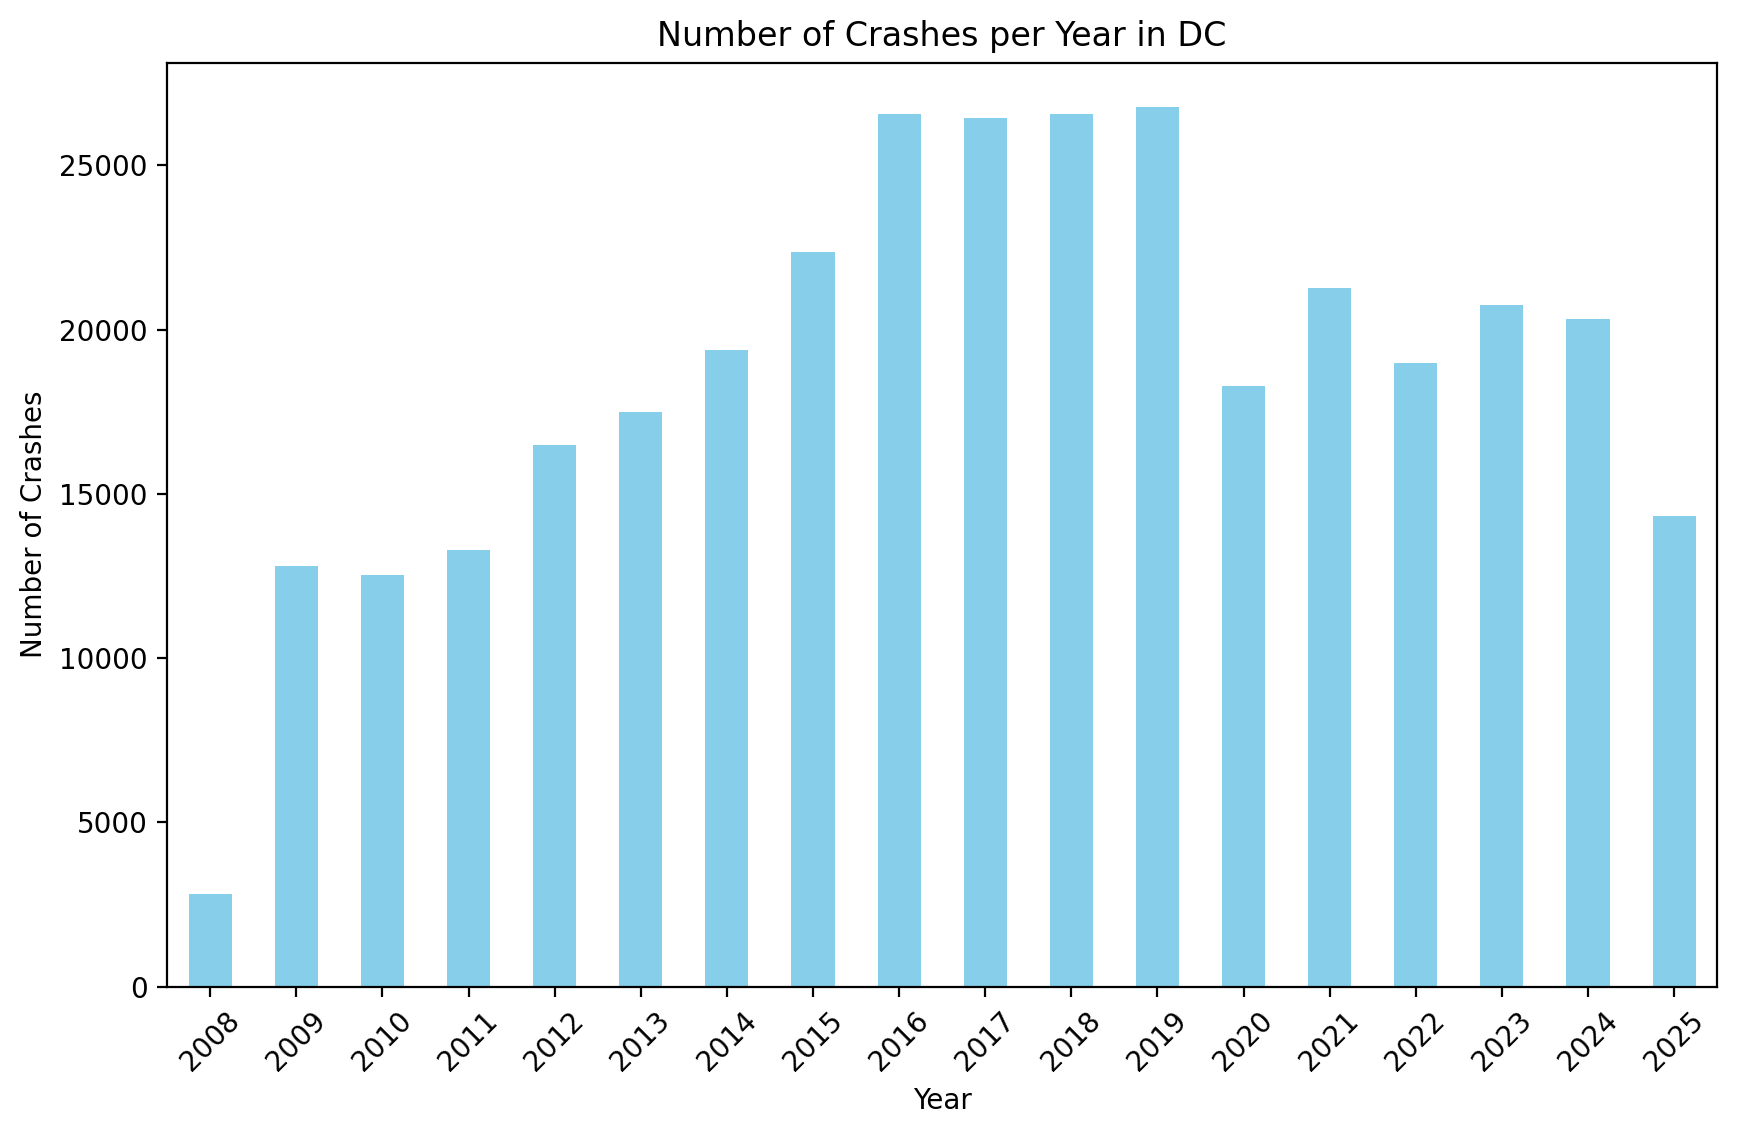

In [166]:
# Calculate the frequency of crashes per year and display the result as a bar chart
crashes_per_year = crashes['YEAR'].value_counts().sort_index()
crashes_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Crashes per Year in DC')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show();

The COVID-19 pandemic decreased the number of crashes.

For further analysis, we only use data from $2024$ and assign it to the variable `crashes_2024`.

In [167]:
# Select only the rows for 2024 and assign it to the variable `crashes_2024`
crashes_2024 = crashes[crashes['YEAR'] == 2024]

The `info` method shows that we have $20322$ observations for $2024$.

In [168]:
# Display information about the `crashes_2024` GeoDataFrame
crashes_2024.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 20322 entries, 303082 to 323491
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   FROMDATE           20322 non-null  datetime64[ms, UTC]
 1   WARD               20322 non-null  object             
 2   TOTAL_VEHICLES     20322 non-null  int32              
 3   TOTAL_BICYCLES     20322 non-null  int32              
 4   TOTAL_PEDESTRIANS  20322 non-null  int32              
 5   SPEEDING_INVOLVED  20322 non-null  int32              
 6   geometry           20322 non-null  geometry           
 7   YEAR               20322 non-null  int16              
 8   MONTH              20322 non-null  int16              
 9   HOUR               20322 non-null  int16              
dtypes: datetime64[ms, UTC](1), geometry(1), int16(3), int32(4), object(1)
memory usage: 1.0+ MB


## Data Analysis and Visualization

In this section, we investigate the number crashes per ward in $2024$ and visualize the distribution of crashes before and after midday.

### Crashes per ward

Our aim is to understand the number of crashes per ward. There are eight wards, listed in the `WARD` column.

In [169]:
# Calculate the frequency of wards
crashes_2024.WARD.value_counts()

WARD
Ward 2    3642
Ward 5    3326
Ward 6    3106
Ward 7    2997
Ward 8    2656
Ward 1    1792
Ward 4    1723
Ward 3    1076
Null         4
Name: count, dtype: int64

There are four observations with `WARD` equal to the string `Null`. These are displayed below.

In [170]:
# Display the rows where `WARD` is `Null`
crashes_2024[crashes_2024['WARD'] == 'Null']

FROMDATE  WARD  TOTAL_VEHICLES  TOTAL_BICYCLES  \
306264 2024-03-01 17:08:00+00:00  Null               2               0   
311765 2024-06-04 01:52:00+00:00  Null               2               0   
312245 2024-06-14 12:47:00+00:00  Null               2               0   
317286 2024-09-10 08:22:00+00:00  Null               2               0   

        TOTAL_PEDESTRIANS  SPEEDING_INVOLVED                        geometry  \
306264                  0                  0  POINT Z (-77.02192 38.90232 0)   
311765                  0                  0  POINT Z (-77.05269 38.96161 0)   
312245                  0                  1   POINT Z (-77.0209 38.90324 0)   
317286                  0                  0  POINT Z (-77.01858 38.90405 0)   

        YEAR  MONTH  HOUR  
306264  2024      3    17  
311765  2024      6     1  
312245  2024      6    12  
317286  2024      9     8

They are removed using the `dropna` method.

In [171]:
# Remove the four observations with `WARD` equal to the string `Null`. These are removed using the `dropna` method.
crashes_2024 = crashes_2024[crashes_2024['WARD'] != 'Null']

A repeat of the frequency of the wards shows that these four observations have been removed.

In [172]:
# Calculate the frequency of wards
crashes_2024.WARD.value_counts()

WARD
Ward 2    3642
Ward 5    3326
Ward 6    3106
Ward 7    2997
Ward 8    2656
Ward 1    1792
Ward 4    1723
Ward 3    1076
Name: count, dtype: int64

Now for the spatial join. Both GeoDataFrame objects must have the same coordinate reference systems to do a spatial join. We verify this using the `crs` attribute.

In [173]:
# Check the coordinate reference systems (CRS)
print("Crashes CRS:", crashes_2024.crs)
print("Wards CRS:", wards.crs)

Crashes CRS: EPSG:4326
Wards CRS: EPSG:4326


Both GeoDataFrame objects are in the World Geodetic System (WGS 84). This is a geographic coordinate system (for latitude and longitude) and not a projected coordinate system.

Now we perform the spatial join using the `sjoin` function. The `crashes_2024` GeoDataFrame is listed first and the `wards` GeoDataFrame object second. Like a standard inner join in a database, the keyword argument `how='inner` means only the records that have a match based on the specified condition are included in the result. Unmatched rows from either the left or right GeoDataFrame are dropped. The keyword argument `predicate='within'` is the spatial condition that defines a _match_ (points in the first are within polygons in the second). A match is made for a geometry in the first GeoDataFrame if it is completely inside the geometry of the second GeoDataFrame. A point that lies exactly on the boundary of a polygon is not considered to be within the polygon.

In [174]:
# Perform spatial join - this joins crash points to the ward polygons they fall within
crashes_with_wards = gpd.sjoin(crashes_2024, wards, how='inner', predicate='within')

The `info` method returns information on the resultant GeoDataFrame object. Note the use of the suffixes `_left` and `_right` to distinguish between columns with the same name in the two GeoDataFrame objects.

In [175]:
# Display info about `crashes_with_wards`
crashes_with_wards.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 20314 entries, 303082 to 323491
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   FROMDATE           20314 non-null  datetime64[ms, UTC]
 1   WARD_left          20314 non-null  object             
 2   TOTAL_VEHICLES     20314 non-null  int32              
 3   TOTAL_BICYCLES     20314 non-null  int32              
 4   TOTAL_PEDESTRIANS  20314 non-null  int32              
 5   SPEEDING_INVOLVED  20314 non-null  int32              
 6   geometry           20314 non-null  geometry           
 7   YEAR               20314 non-null  int16              
 8   MONTH              20314 non-null  int16              
 9   HOUR               20314 non-null  int16              
 10  index_right        20314 non-null  int64              
 11  WARD_right         20314 non-null  int32              
 12  NAME               20314 non-null  ob

The `NAME` column contains the ward name for each crash. We use the `value_counts` method to display the frequency of crashes per ward.

In [176]:
# Count crashes per ward and assign to `crash_counts`
crash_counts = crashes_with_wards.groupby('NAME').size().reset_index(name='crash_count')

The counts are shown below.

In [177]:
# Display the `crash_counts` DataFrame
crash_counts

NAME  crash_count
0  Ward 1         1776
1  Ward 2         3377
2  Ward 3         1102
3  Ward 4         1754
4  Ward 5         3317
5  Ward 6         2861
6  Ward 7         3260
7  Ward 8         2867

This `crash_counts` pandas DataFrame object is merged with the `wards` GeoDataFrame using the `merge` method. Both the `wards` and the `crash_counts` objects have the column `NAME` and we use it for the merge. The `how='left'` argument means that all rows from the `wards` GeoDataFrame are kept, even if there is no match in the `crash_counts` DataFrame. If there is no match, the corresponding values in the new columns will be filled with `NaN`.

In [178]:
# Merge the counts back to the ward polygons
wards_with_counts = wards.merge(crash_counts, on='NAME', how='left')

We can now visualize the counts per ward. To do so, we cange the coordinate refernce system to Web Marcator as our basemaps are in this projection.

In [179]:
# Change the CRS of the `wards_with_counts` GeoDataFrame to Web Mercator (EPSG:3857)
# and assign it to the variable `wards_web_mercator`
wards_web_mercator = wards_with_counts.to_crs(epsg=3857)

We can now plot the number of crashes per ward using a quantile scheme for the choropleth map.

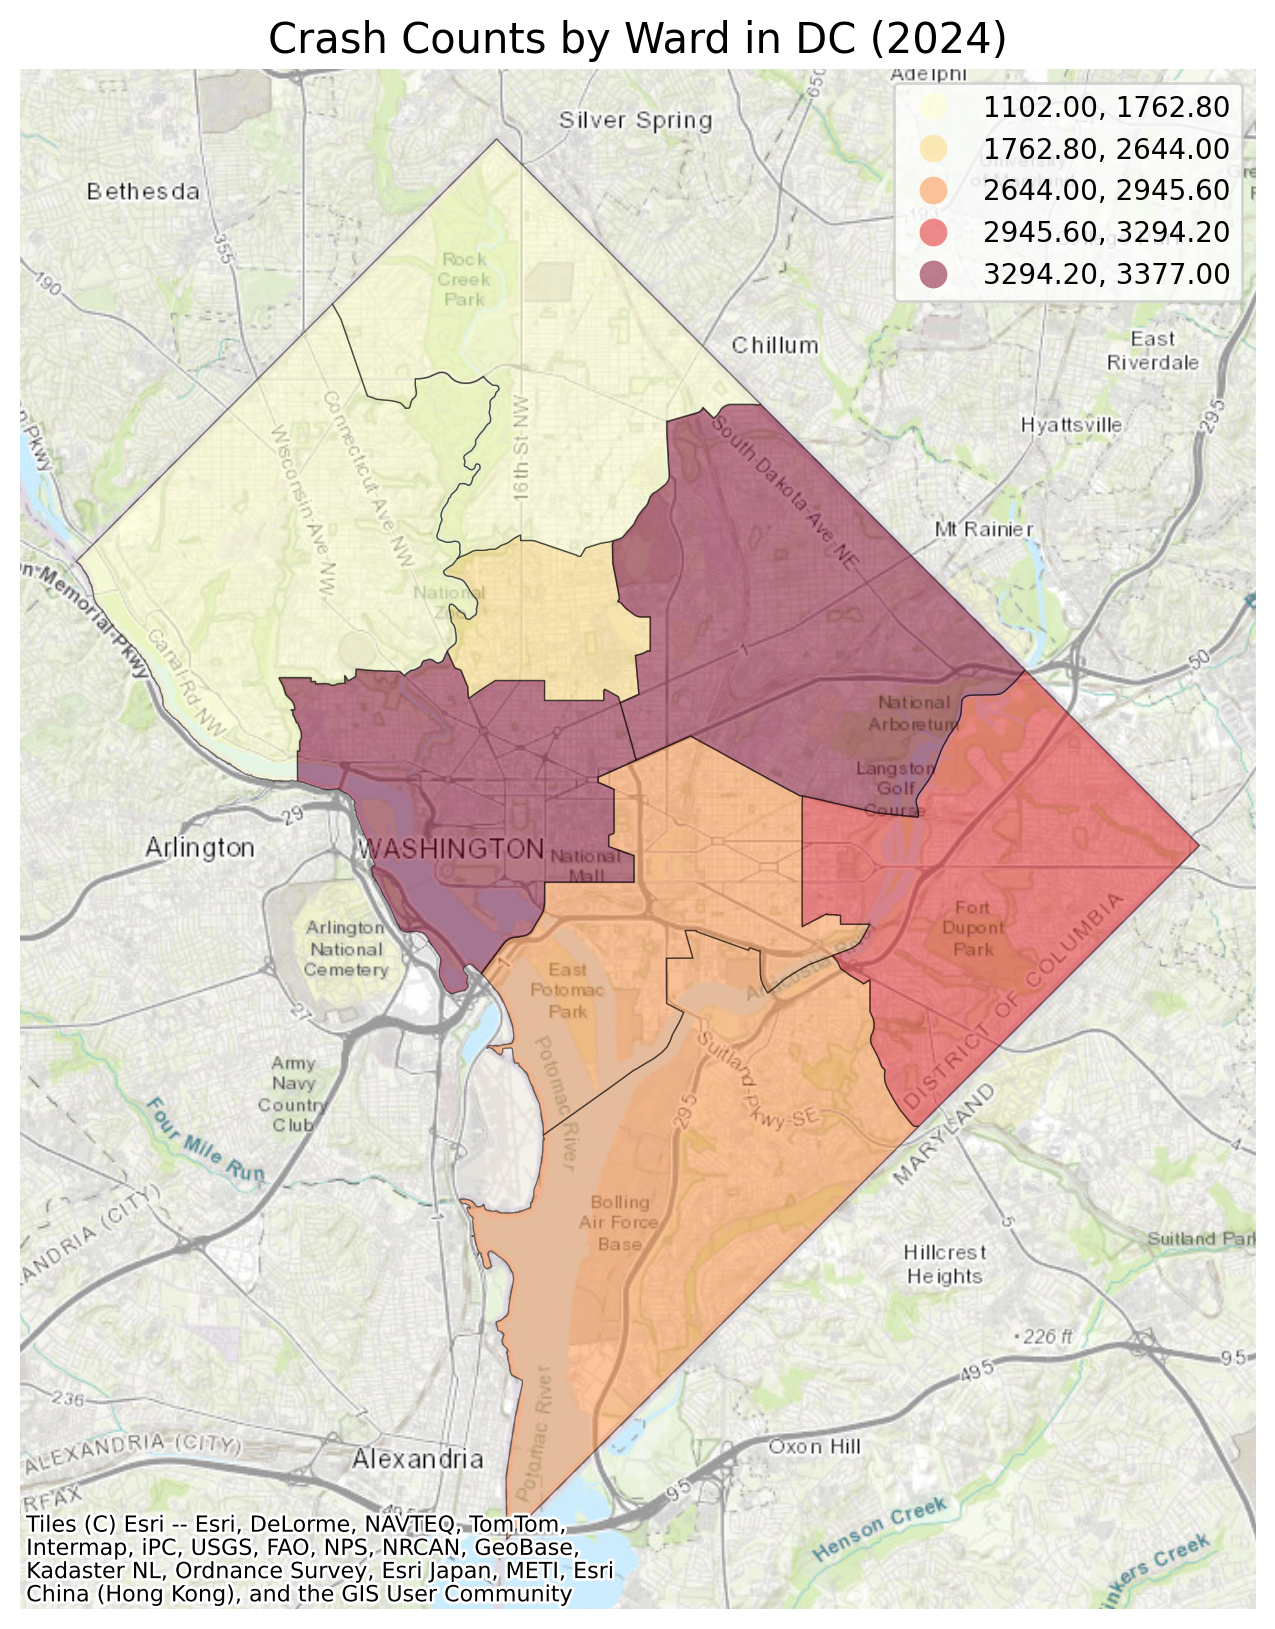

In [180]:
# Create a visualization of `wards_web_mercator` showing crash counts per ward
# Use a quantile scheme for coloring the wards based on crash counts
# Add a basemap for context
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot wards colored by crash count
wards_web_mercator.plot(column='crash_count',
                        scheme='quantiles',
                        ax=ax, 
                        legend=True,
                        cmap='YlOrRd',
                        edgecolor='black',
                        linewidth=0.5,
                        alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldTopoMap)
ax.set_title('Crash Counts by Ward in DC (2024)', fontsize=15)
ax.axis('off')
plt.show();

### Point Pattern Analysis

In [181]:
# Create a new GeoDataFrame `crashes_2024_morning` from `crashes_2024` if the 'HOUR' is between midnight and midday
crashes_2024_morning = crashes_2024[(crashes_2024['HOUR'] >= 0) & (crashes_2024['HOUR'] < 12)]

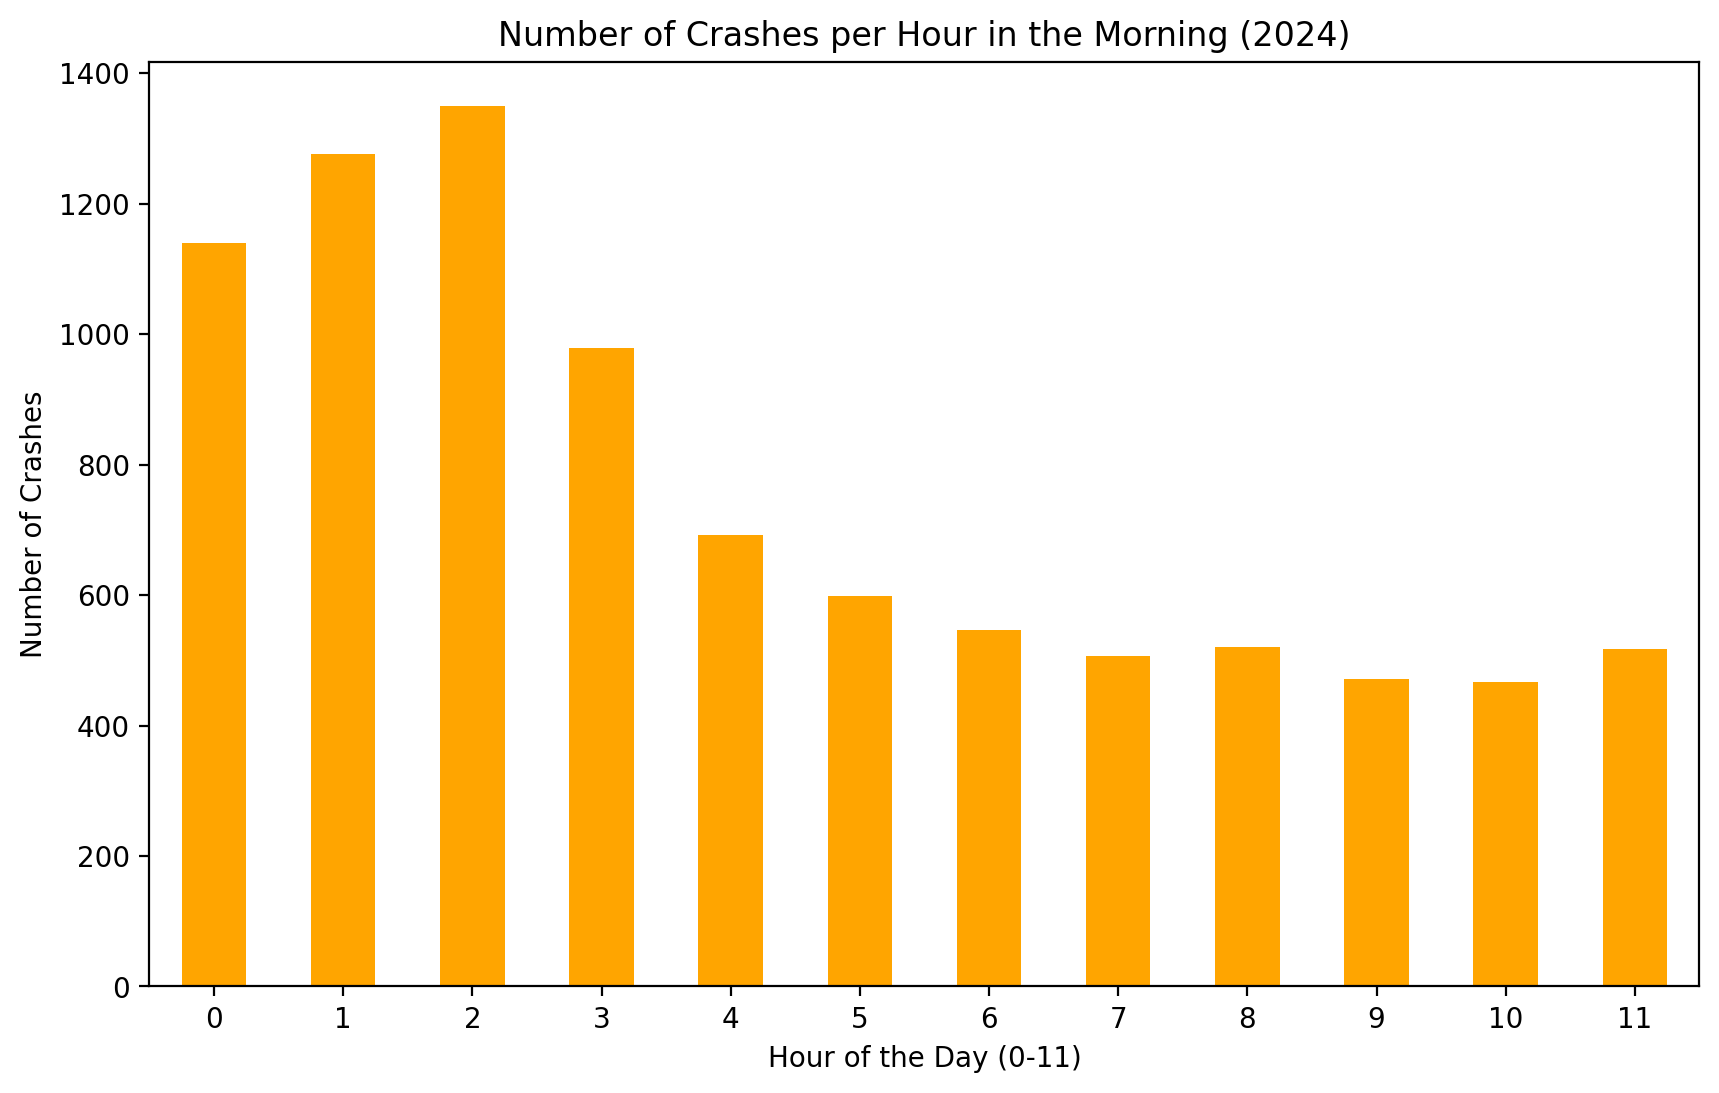

In [182]:
# Count the frequency of crashes per hour in the morning and display the result
# Use integer hours (0-11) on the x-axis
crashes_per_hour_morning = crashes_2024_morning['HOUR'].value_counts().sort_index()
crashes_per_hour_morning.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Crashes per Hour in the Morning (2024)')
plt.xlabel('Hour of the Day (0-11)')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show();

Interestingly, most crashes were reported around $2$ AM.

In [183]:
# Create a new GeoDataFrame `crashes_2024_afternoon` from `crashes_2024` if the 'REPORTHOUR' is between midday and midnight
crashes_2024_afternoon = crashes_2024[crashes_2024['HOUR'].between(12, 23)]

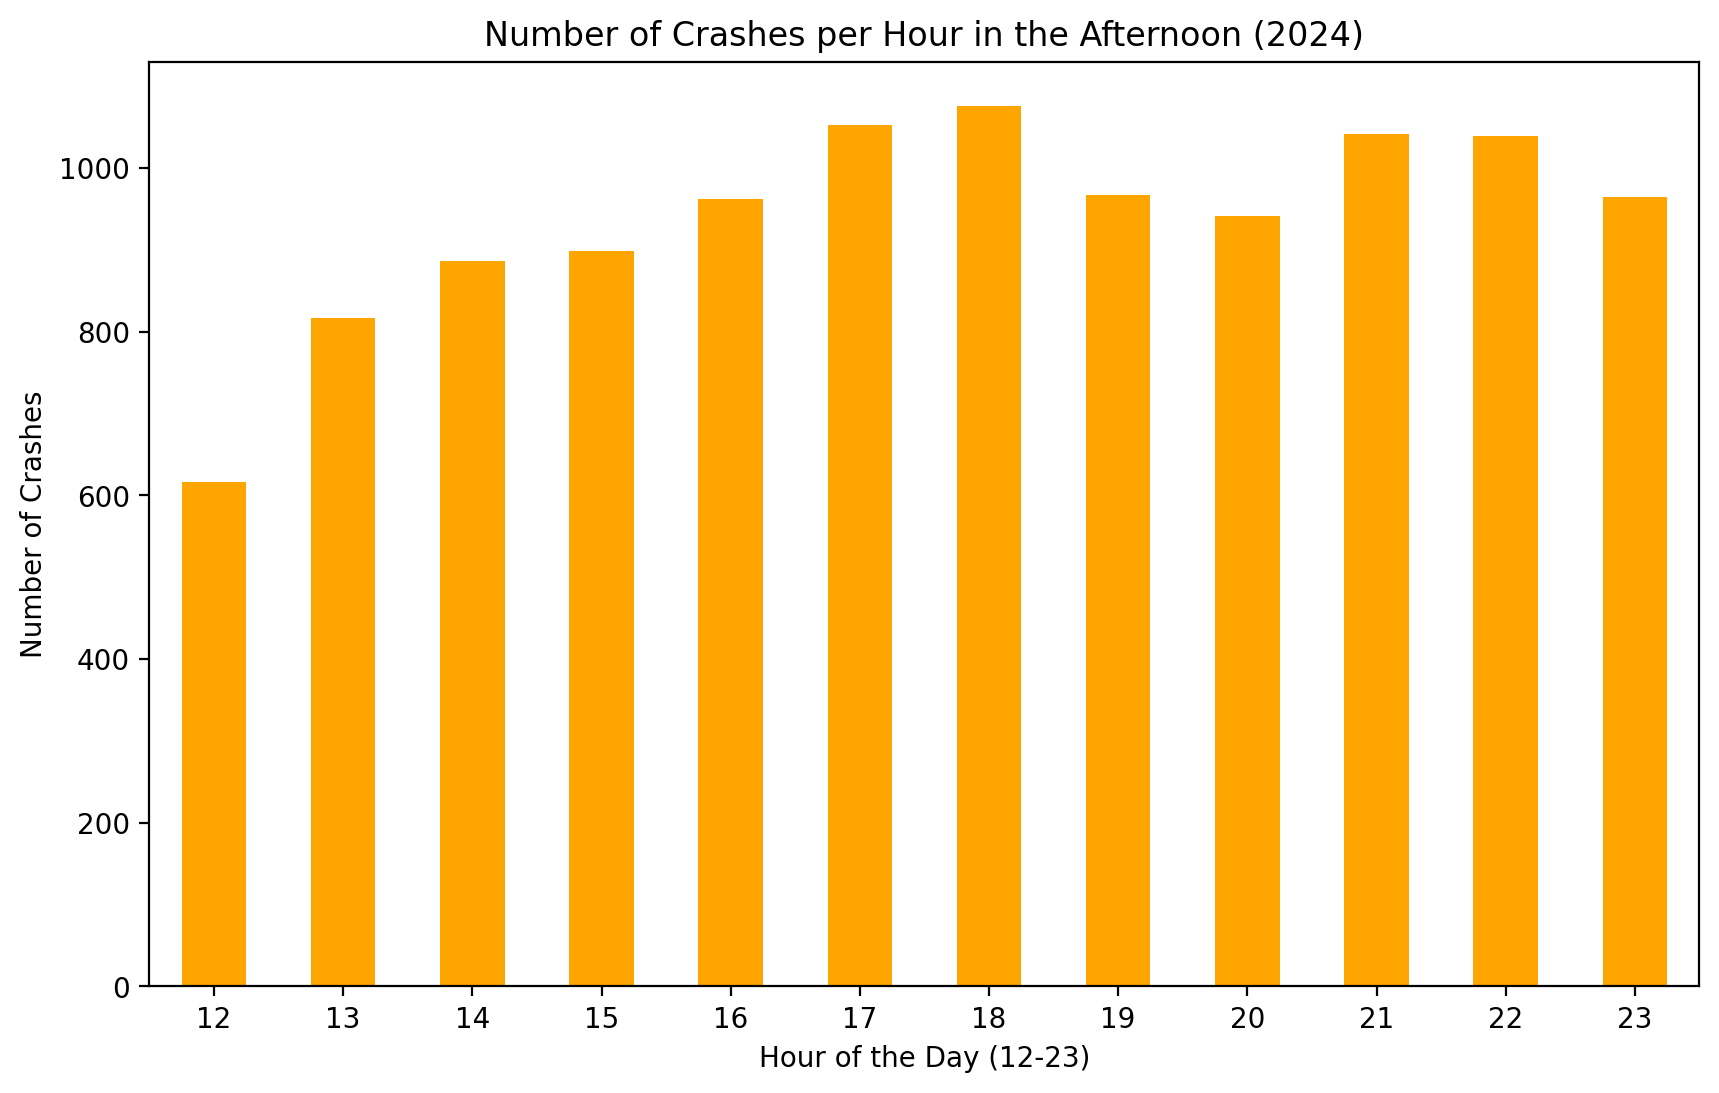

In [184]:
# Count the frequency of crashes per hour in the afternoon and display the result
# Use integer hours (12-23) on the x-axis
crashes_per_hour_afternoon = crashes_2024_afternoon['HOUR'].value_counts().sort_index()
crashes_per_hour_afternoon.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Crashes per Hour in the Afternoon (2024)')
plt.xlabel('Hour of the Day (12-23)')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show();

Finally, an informative way to plot the crashes is to show _clusters_ of points. A kernel density estimate (KDE) is a non-parametric way to estimate the probability density function of a random variable. In this case, we use it to estimate the density of crash locations. We add a base map using the `contextily` library. The base maps are projected in Web Mercator, so we must change the coordinate reference system of the `crashes_2024` GeoDataFrame.

We create two plots using the geoplot package. The first shows crashes that occurred before midday (12 PM) and the second shows crashes that occurred after midday.

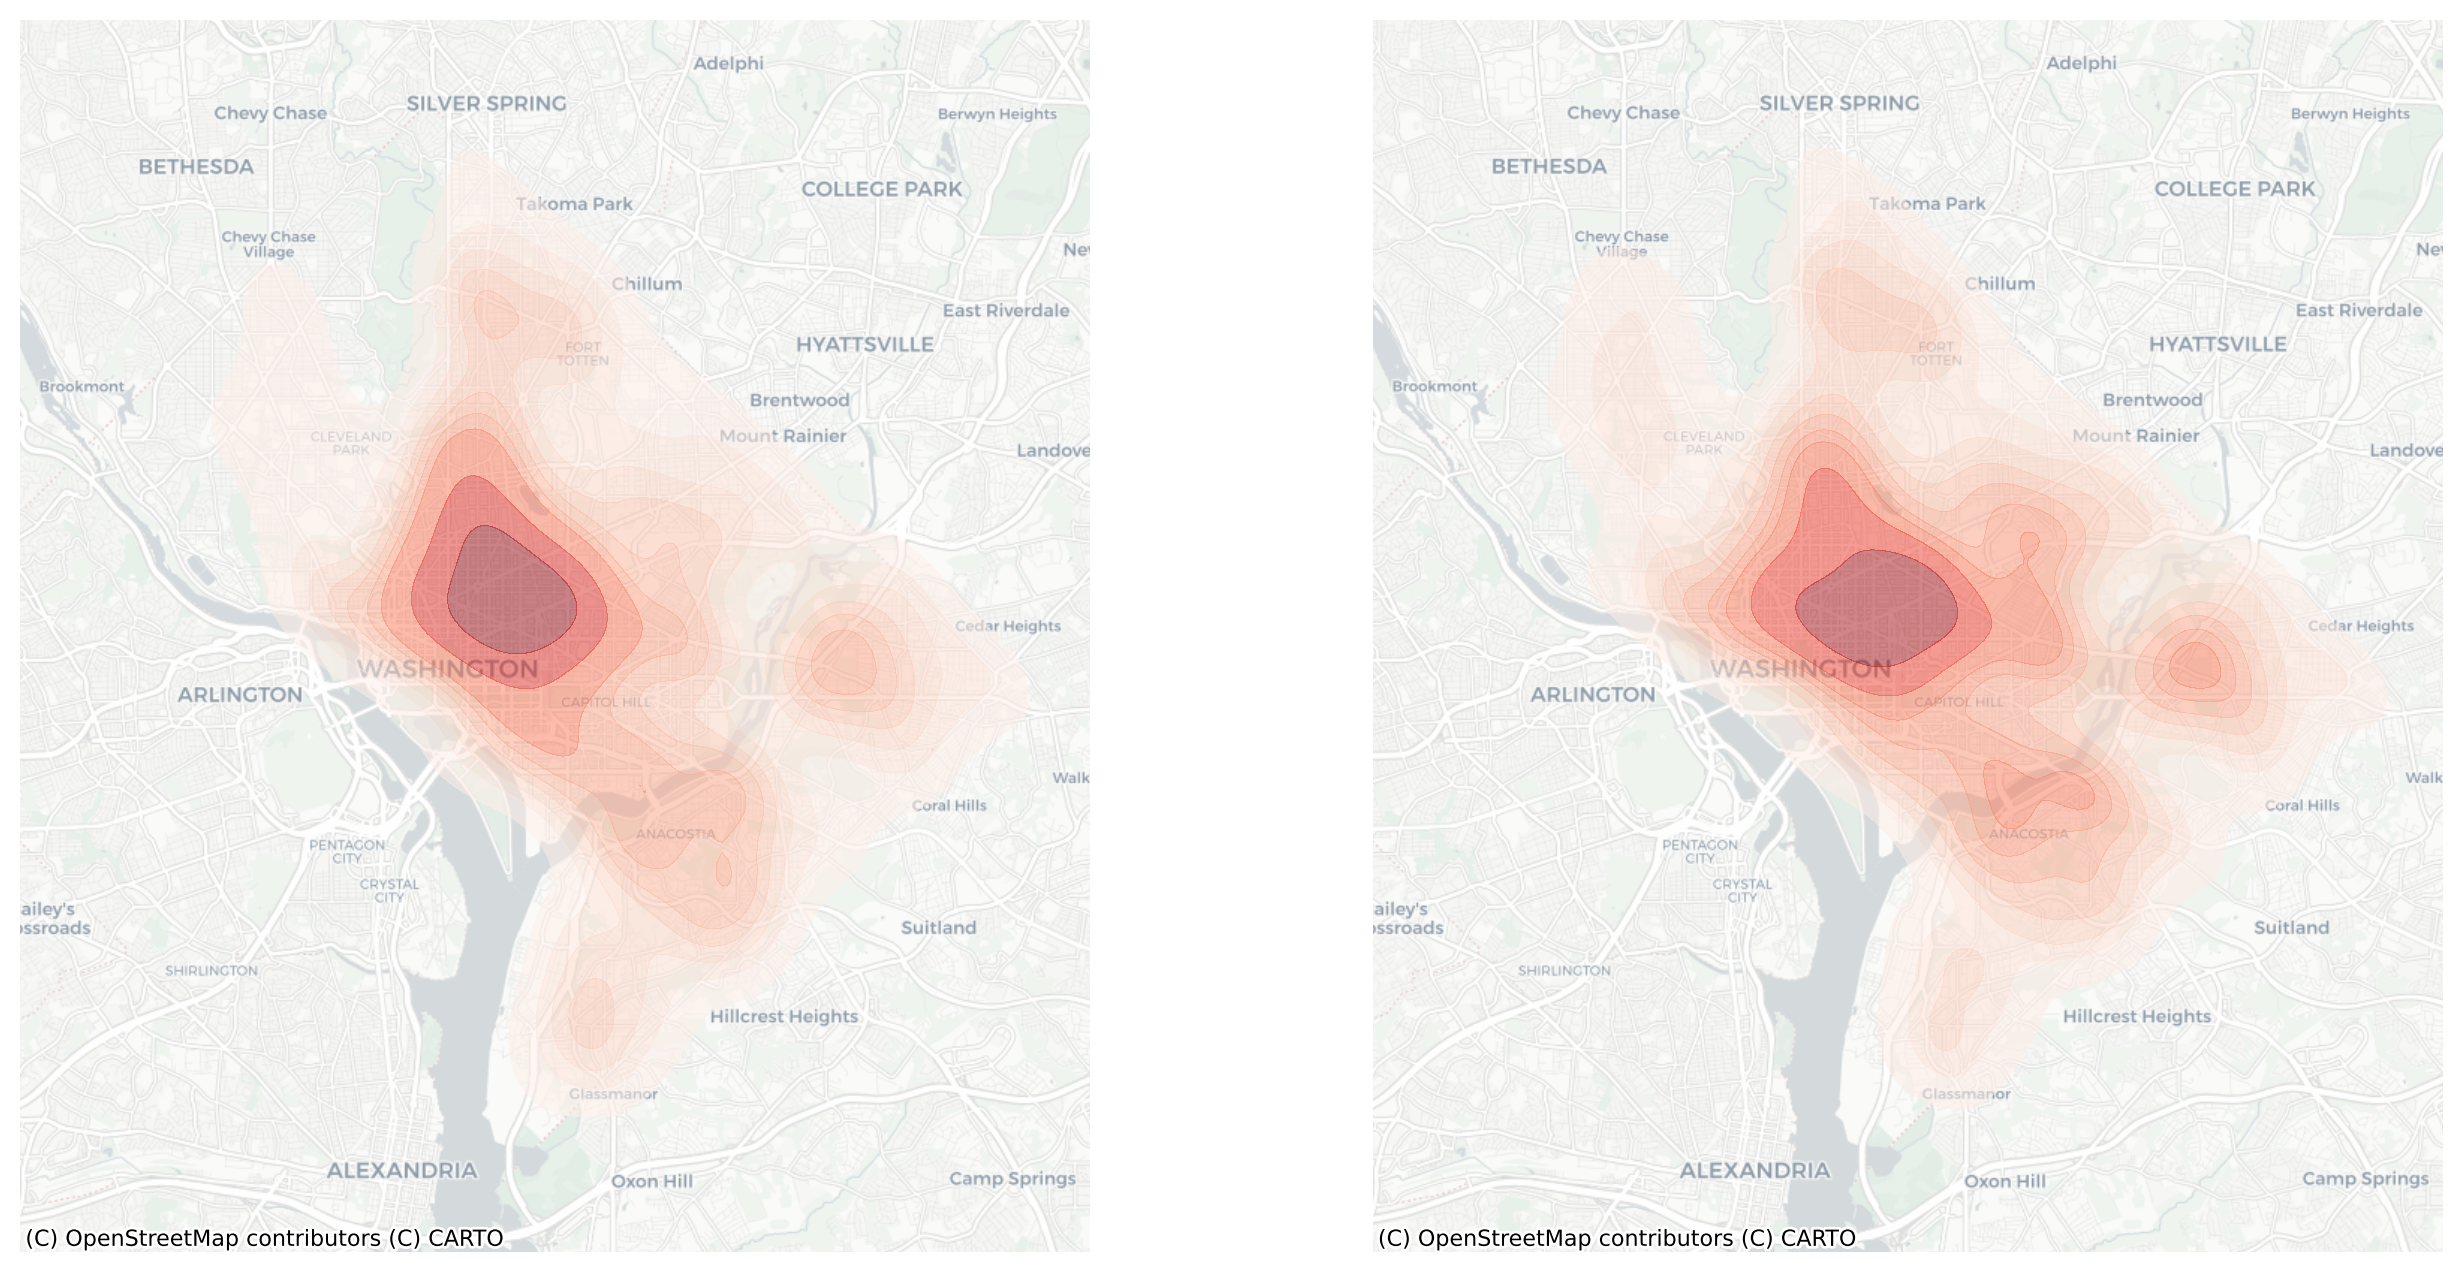

In [ ]:
# Create a side-by-side comparison of crash density in the morning and afternoon using kernel density estimation (KDE) plots
# Use the Web Mercator projection for both plots
proj = gcrs.WebMercator()

f, axarr = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': proj})

gplt.kdeplot(crashes_2024_morning, cmap='Reds', fill=True, ax=axarr[0], alpha=0.5)
ctx.add_basemap(axarr[0], source=ctx.providers.CartoDB.Positron)

gplt.kdeplot(crashes_2024_afternoon, cmap='Reds', fill=True, ax=axarr[1], alpha=0.5)
ctx.add_basemap(axarr[1], source=ctx.providers.CartoDB.Positron);

## Sources and Further Reading

[1] Crashes in DC - Open Data DC https://opendata.dc.gov/datasets/crashes-in-dc/about

[2] DC region traffic crashes killed 110 pedestrians and bicyclists in 2024 https://www.mwcog.org/newsroom/2025/04/04/dc-region-traffic-crashes-killed-110-pedestrians-and-bicyclists-in-2024/

[3] Washington D.C. Car Accident Statistics [2024] - Lightfoot Law, PLLC https://www.lightfootlawdc.com/washington-d-c-car-accident-statistics-2024/

[4] MPD Investigating Fatal Hit and Run Crash | mpdc https://mpdc.dc.gov/release/mpd-investigating-fatal-hit-and-run-crash

[5] Several injuries and one death after Route 210 collision near DC https://usattorneys.com/several-injuries-and-one-death-after-route-210-collision-near-dc/

[6] Data Science in VS Code tutorial https://code.visualstudio.com/docs/datascience/data-science-tutorial

[7] Two-vehicle crash in Northwest DC leaves several hospitalized https://www.yahoo.com/news/articles/two-vehicle-crash-northwest-dc-125803782.html

[8] Full Course - Python for Geospatial Data Analysis for Beginners https://www.youtube.com/watch?v=KoLAlcBv290

[9] Five Hospitalized After Northwest DC Car Crash https://www.washingtondcinjurylawyerblog.com/five-hospitalized-after-northwest-dc-car-crash/

[10] Geospatial Data Analysis with Python https://uwgda-jupyterbook.readthedocs.io

[11] You might be shocked by the total number of crashes documented ... https://wtop.com/traffic/2025/01/you-might-be-shocked-by-the-total-number-of-crashes-documented-by-the-wtop-traffic-center-in-2024-or-you-might-not-be/

[12] Creating Beautiful Geospatial Data Visualizations with Python https://www.youtube.com/watch?v=cjfqCHHp-AE

[13] Crashes in DC - Dataset - Catalog - Data.gov https://catalog.data.gov/dataset/crashes-in-dc

[14] The Ultimate VS Code Setup for Data & AI Projects - YouTube https://www.youtube.com/watch?v=mpk4Q5feWaw

[15] Data Science in Visual Studio Code https://code.visualstudio.com/docs/datascience/overview

[16] How I Set Up Data Science Projects (with VS Code and DVC) https://towardsdatascience.com/how-i-setup-environment-for-data-science-projects-feat-git-vs-code-and-dvc-273a696ce8d7/

[17] Data Science: Setup Visual Studio Code with Python https://dev.to/azadkshitij/data-science-setup-visual-studio-code-with-python-1gml